<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center> 

_____

<a id='home'></a>

# Data Preprocessing in Python: Data Integration and Reshaping

I will cover some important processes for DFs:
* [Appending](#appending)
* [Reshaping](#reshaping)
* [Merging](#merging)

Finally, we will see some simple code for:
* [Scaling](#scaling)
* [Exporting](#exporting)

<a id='appending'></a>

# Appending

As the name implies, this process binds DFs into one, that is, one or more DFs will be put below or on top of another DF. Appending can be done when you fulfill these requisites:
1. All the DFs  share the same column names.
2. All the DFs  columns are in the same location.

Note that it is better if the columns share the same data types. But you can solve it during the formatting process.


Let's visit this website: https://fundforpeace.org/what-we-do/country-risk-and-fragility-data/

There, you will find several excel files with the _Fragile States Index_ per year. I have the files from 2013 to 2021 in a repo:

In [1]:
# link to repo
dataRepo='https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/'

In [2]:
# creating file names into a list:
years=range(2013,2022)
fileNames=['fsi-'+str(year)+'.xlsx' for year in years]
# list of file names
fileNames

['fsi-2013.xlsx',
 'fsi-2014.xlsx',
 'fsi-2015.xlsx',
 'fsi-2016.xlsx',
 'fsi-2017.xlsx',
 'fsi-2018.xlsx',
 'fsi-2019.xlsx',
 'fsi-2020.xlsx',
 'fsi-2021.xlsx']

In [3]:
# creating the url to each file:
alltheLinks=[dataRepo+fn for fn in fileNames]
alltheLinks

['https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2013.xlsx',
 'https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2014.xlsx',
 'https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2015.xlsx',
 'https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2016.xlsx',
 'https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2017.xlsx',
 'https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2018.xlsx',
 'https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2019.xlsx',
 'https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2020.xlsx',
 'https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/fsi-2021.xlsx']

We will save each data frame in a list **allDFs**. We will use pandas, but we need **openpyxl** and **xlrd** (for Excel) before doing this operation:

In [4]:
# creating list of DFs
allDFs=[]

import pandas as pd

for link in alltheLinks:
    current=pd.read_excel(link)
    allDFs.append(current)

2013
2014
2015
2016
2017
2018
2019


In [5]:
# saving column names
allColumnNames=[]
for df in allDFs:
    allColumnNames.append(set(df.columns))# list of sets!

In [6]:
# checking how many columns per df

[len(cols) for cols in allColumnNames]

[16, 16, 16, 16, 16, 16, 17, 17, 16]

We have an extra column in a couple of years. 
Let's find the common columns:

In [7]:
# details of common columns
commonColumns=set.intersection(*allColumnNames) # expanding list of sets (*)
len(commonColumns),commonColumns

(16,
 {'C1: Security Apparatus',
  'C2: Factionalized Elites',
  'C3: Group Grievance',
  'Country',
  'E1: Economy',
  'E2: Economic Inequality',
  'E3: Human Flight and Brain Drain',
  'P1: State Legitimacy',
  'P2: Public Services',
  'P3: Human Rights',
  'Rank',
  'S1: Demographic Pressures',
  'S2: Refugees and IDPs',
  'Total',
  'X1: External Intervention',
  'Year'})

These are the columns not in the common names:

In [21]:
# not in common columns
[set.difference(cols,commonColumns) for cols in allColumnNames if len(cols-commonColumns)>0]

[{'Change from Previous Year'}, {'Change from Previous Year'}]

We could make a list of data frames with only the common columns:

In [22]:
# DFs with the common columns
allDFs_sameNames=[]
for df in allDFs:
    allDFs_sameNames.append(df.loc[:,list(commonColumns)])

Appending in pandas requires a list of data frames, in these case that is **allDFs_sameNames**. Then we proceed:

In [23]:
# appending
allDFsConcat=pd.concat(allDFs_sameNames)
allDFsConcat.head()

,E1: Economy,Rank,C2: Factionalized Elites,C1: Security Apparatus,P1: State Legitimacy,P2: Public Services,E2: Economic Inequality,Country,C3: Group Grievance,X1: External Intervention,S2: Refugees and IDPs,Year,Total,E3: Human Flight and Brain Drain,S1: Demographic Pressures,P3: Human Rights
0,9.4,1st,10.0,9.7,9.5,9.8,8.4,Somalia,9.3,9.4,10.0,2013-01-01 00:00:00,113.9,8.9,9.5,10.0
1,8.5,2nd,9.5,10.0,9.6,9.5,8.8,Congo Democratic Republic,9.4,9.7,10.0,2013-01-01 00:00:00,111.9,7.1,10.0,9.8
2,7.8,3rd,10.0,9.8,9.6,8.8,8.5,Sudan,10.0,10.0,10.0,2013-01-01 00:00:00,111.0,8.4,8.8,9.3
3,8.6,4th,9.8,9.6,9.1,9.8,8.9,South Sudan,10.0,10.0,10.0,2013-01-01 00:00:00,110.6,6.5,8.9,9.3
4,8.0,5th,9.5,9.4,9.7,9.9,8.9,Chad,8.8,7.9,9.7,2013-01-01 00:00:00,109.0,8.0,9.5,9.8


We could pay attention to the current data types:

In [24]:
allDFsConcat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 0 to 178
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   E1: Economy                       1603 non-null   float64
 1   Rank                              1603 non-null   object 
 2   C2: Factionalized Elites          1603 non-null   float64
 3   C1: Security Apparatus            1603 non-null   float64
 4   P1: State Legitimacy              1603 non-null   float64
 5   P2: Public Services               1603 non-null   float64
 6   E2: Economic Inequality           1603 non-null   float64
 7   Country                           1603 non-null   object 
 8   C3: Group Grievance               1603 non-null   float64
 9   X1: External Intervention         1603 non-null   float64
 10  S2: Refugees and IDPs             1603 non-null   float64
 11  Year                              1603 non-null   object 
 12  Total  

The columns **Year** was expected to be a numeric type, but we got an _object_ instead. Let's explore that column:

In [25]:
# exploring year column as frequency table
allDFsConcat.Year.value_counts()

2021                   179
2013-01-01 00:00:00    178
2014-01-01 00:00:00    178
2015-01-01 00:00:00    178
2016-01-01 00:00:00    178
2017-01-01 00:00:00    178
2018-01-01 00:00:00    178
2019-01-01 00:00:00    178
2020-01-01 00:00:00    178
Name: Year, dtype: int64

Except for the year 2021, the other values are in date-time format. We just need an integer number, then:

In [27]:
# keeping just the year value
yearAsNumber=[]
for y in allDFsConcat.Year:
    try:
        yearAsNumber.append(y.year)# the value from a date-time format
    except:
        yearAsNumber.append(y) # if not a datetime

#verifying
pd.Series(yearAsNumber).value_counts()

2021    179
2013    178
2014    178
2015    178
2016    178
2017    178
2018    178
2019    178
2020    178
dtype: int64

In [28]:
# overwriting the year column
allDFsConcat.Year=yearAsNumber

You may have notice that the column ordering does not look appropriate. In general you expect that the columns to the left start with identification of the rows rather than some measurements. Let's move 'Country','Year','Total' to the left:

In [30]:
# this is a trick: setting columns as index
allDFsConcat.set_index(['Country','Year','Total'],inplace=True)
allDFsConcat.head()

,,,E1: Economy,Rank,C2: Factionalized Elites,C1: Security Apparatus,P1: State Legitimacy,P2: Public Services,E2: Economic Inequality,C3: Group Grievance,X1: External Intervention,S2: Refugees and IDPs,E3: Human Flight and Brain Drain,S1: Demographic Pressures,P3: Human Rights
Country,Year,Total,,,,,,,,,,,,,
Somalia,2013,113.9,9.4,1st,10.0,9.7,9.5,9.8,8.4,9.3,9.4,10.0,8.9,9.5,10.0
Congo Democratic Republic,2013,111.9,8.5,2nd,9.5,10.0,9.6,9.5,8.8,9.4,9.7,10.0,7.1,10.0,9.8
Sudan,2013,111.0,7.8,3rd,10.0,9.8,9.6,8.8,8.5,10.0,10.0,10.0,8.4,8.8,9.3
South Sudan,2013,110.6,8.6,4th,9.8,9.6,9.1,9.8,8.9,10.0,10.0,10.0,6.5,8.9,9.3
Chad,2013,109.0,8.0,5th,9.5,9.4,9.7,9.9,8.9,8.8,7.9,9.7,8.0,9.5,9.8


Since I will not use _Rank_, I will get rid of it:

In [31]:
# dropping unneeded column
allDFsConcat.drop(columns='Rank',inplace=True)

Let's order the current column names:

In [32]:
# ordering column names alphabetically
allDFsConcat.sort_index(axis=1,inplace=True) # by row index will be axis=0

Now put the row indexes back:

In [33]:
# indexes will be columns
allDFsConcat.reset_index(inplace=True)

Let's do some cleaning on the column names:

In [34]:
# see column names
allDFsConcat.columns.to_list()

['Country',
 'Year',
 'Total',
 'C1: Security Apparatus',
 'C2: Factionalized Elites',
 'C3: Group Grievance',
 'E1: Economy',
 'E2: Economic Inequality',
 'E3: Human Flight and Brain Drain',
 'P1: State Legitimacy',
 'P2: Public Services',
 'P3: Human Rights',
 'S1: Demographic Pressures',
 'S2: Refugees and IDPs',
 'X1: External Intervention']

In [35]:
# clean column names
allDFsConcat.columns=allDFsConcat.columns.str.replace(':\s',"_",regex=True)
allDFsConcat.columns=allDFsConcat.columns.str.replace('\s',"",regex=True)
#see
allDFsConcat.columns.to_list()

['Country',
 'Year',
 'Total',
 'C1_SecurityApparatus',
 'C2_FactionalizedElites',
 'C3_GroupGrievance',
 'E1_Economy',
 'E2_EconomicInequality',
 'E3_HumanFlightandBrainDrain',
 'P1_StateLegitimacy',
 'P2_PublicServices',
 'P3_HumanRights',
 'S1_DemographicPressures',
 'S2_RefugeesandIDPs',
 'X1_ExternalIntervention']

Let's set the country names into upper case:

In [36]:
# overwriting country
allDFsConcat.Country=allDFsConcat.Country.str.upper()

Finally, let's check the format:

In [37]:
allDFsConcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1603 entries, 0 to 1602
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      1603 non-null   object 
 1   Year                         1603 non-null   int64  
 2   Total                        1603 non-null   float64
 3   C1_SecurityApparatus         1603 non-null   float64
 4   C2_FactionalizedElites       1603 non-null   float64
 5   C3_GroupGrievance            1603 non-null   float64
 6   E1_Economy                   1603 non-null   float64
 7   E2_EconomicInequality        1603 non-null   float64
 8   E3_HumanFlightandBrainDrain  1603 non-null   float64
 9   P1_StateLegitimacy           1603 non-null   float64
 10  P2_PublicServices            1603 non-null   float64
 11  P3_HumanRights               1603 non-null   float64
 12  S1_DemographicPressures      1603 non-null   float64
 13  S2_RefugeesandIDPs

[Home](#home)

______

<a id='reshaping'></a>

# Reshaping

Data frames have have different shapes. Let me keep some columns from the last DF so you can notice something:

In [38]:
# seeing long shape
fragileLong=allDFsConcat.iloc[:,:3]
fragileLong

,Country,Year,Total
0,SOMALIA,2013,113.9
1,CONGO DEMOCRATIC REPUBLIC,2013,111.9
2,SUDAN,2013,111.0
3,SOUTH SUDAN,2013,110.6
4,CHAD,2013,109.0
...,...,...,...
1598,DENMARK,2021,18.8
1599,NEW ZEALAND,2021,18.4
1600,ICELAND,2021,18.0
1601,NORWAY,2021,16.6


You notice a DF is in long shape when you see the unit of analysis repeated in more than one cell.

Let me turn our **long** into **wide** shape:

In [39]:
# to wide
fragileWide=pd.pivot_table(fragileLong,
               values='Total', # values to use
               index=['Country'], # unit of analysis
               columns=['Year']) # the values for NEW column
# see wide
fragileWide.head()

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,
AFGHANISTAN,106.7,106.5,107.9,107.9,107.3,106.620768,105.0,102.901187,102.1
ALBANIA,65.2,63.6,61.9,61.2,60.5,60.079308,58.9,58.753811,59.0
ALGERIA,78.7,78.8,79.6,78.3,76.8,75.785052,75.4,74.575183,73.6
ANGOLA,87.1,87.4,87.9,90.5,91.1,89.440296,87.8,87.320039,89.0
ANTIGUA AND BARBUDA,58.0,59.0,57.8,56.2,54.8,55.611041,54.4,52.062352,54.9


The **wide** shape from a **pivot_table** function looks great, but pay attention:

In [41]:
fragileWide.columns

Int64Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='Year')

As you see above, the country is the row _index_ (row name), not a column. You may want this:

In [43]:
# resetting index, keeping last index as a column
fragileWide= fragileWide.reset_index(drop=False).\
             rename_axis(index=None, columns=None) # no name for indexes

# result:
fragileWide.head()

,index,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,0,AFGHANISTAN,106.7,106.5,107.9,107.9,107.3,106.620768,105.0,102.901187,102.1
1,1,ALBANIA,65.2,63.6,61.9,61.2,60.5,60.079308,58.9,58.753811,59.0
2,2,ALGERIA,78.7,78.8,79.6,78.3,76.8,75.785052,75.4,74.575183,73.6
3,3,ANGOLA,87.1,87.4,87.9,90.5,91.1,89.440296,87.8,87.320039,89.0
4,4,ANTIGUA AND BARBUDA,58.0,59.0,57.8,56.2,54.8,55.611041,54.4,52.062352,54.9


Long shape is efficient in the presence of missing values:

In [44]:
# missing values in long format
fragileLong[fragileLong.isna().any(axis=1)]

,Country,Year,Total


Wide shape will create missing values when needed:

In [45]:
# what cells have missing values?
fragileWide[fragileWide.isna().any(axis=1)]

,index,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021
27,27,CABO VERDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.2
31,31,CAPE VERDE,73.7,74.1,73.5,71.5,70.1,68.000000,66.6,64.778171,NaN
45,45,CZECH REPUBLIC,39.9,39.4,37.4,40.8,40.1,39.047601,NaN,35.741616,NaN
46,46,CZECHIA,NaN,NaN,NaN,NaN,NaN,NaN,37.6,NaN,39.3
56,56,ESWATINI,NaN,NaN,NaN,NaN,NaN,NaN,85.3,NaN,82.5
81,81,ISRAEL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0
82,82,ISRAEL AND WEST BANK,80.8,79.5,79.4,79.7,78.9,78.533740,76.5,75.123972,NaN
90,90,KYRGYZ REPUBLIC,85.7,83.9,82.2,81.1,80.3,78.634122,76.2,73.929364,NaN
91,91,KYRGYZSTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.4
100,100,MACEDONIA,68.0,66.4,64.5,67.0,66.1,64.797158,64.6,62.130864,NaN


This last request shows us problems.
As you can see, even though the data DFs were prepared by the same organization, the DFs have country names that differ among them. Here we need some **manual** changes: 

In [46]:
# prepare changes as dict:
changes={"CABO VERDE": "CAPE VERDE",
"CZECHIA":"CZECH REPUBLIC",
"SWAZILAND":"ESWATINI",
"ISRAEL AND WEST BANK":"ISRAEL",
"KYRGYZSTAN":"KYRGYZ REPUBLIC",
"NORTH MACEDONIA":"MACEDONIA",
"SLOVAKIA": "SLOVAK REPUBLIC"}

Notice I am making the changes in the long shape of the DF, so that the wide shape will work fine:

In [47]:
# make changes using 'replace':
fragileLong.Country.replace(to_replace=changes,inplace=True)

Let's redo the wide reshape:

In [48]:
# to wide shape again
fragileWide=pd.pivot_table(fragileLong,
               values='Total',
               index=['Country'],
               columns=['Year']).\
            reset_index(drop=False).\
            rename_axis(index=None, columns=None)

# verify missing
fragileWide[fragileWide.isna().any(axis=1)]

,Country,2013,2014,2015,2016,2017,2018,2019,2020,2021
124,PALESTINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0


You have to be very careful when working with countries, specially when you are including or excluding countries; which may cause you hurting someone else's feelings. 

For instance, here I am just keeping **rows** with no missing values:

In [49]:
fragileWide.dropna(inplace=True) 

After dropping rows, I recommend you reset the indexes:

In [50]:
fragileWide.reset_index(drop=True,inplace=True) 

For sure, we can turn this wide shape into a long one, using the function **melt**:

In [51]:
pd.melt(fragileWide, id_vars=['Country'])

,Country,variable,value
0,AFGHANISTAN,2013,106.7
1,ALBANIA,2013,65.2
2,ALGERIA,2013,78.7
3,ANGOLA,2013,87.1
4,ANTIGUA AND BARBUDA,2013,58.0
...,...,...,...
1597,VENEZUELA,2021,92.6
1598,VIETNAM,2021,63.3
1599,YEMEN,2021,111.7
1600,ZAMBIA,2021,84.9


This would be more explicit:

In [52]:
fragileLong=pd.melt(fragileWide, #DF
        id_vars=['Country'], #key
        value_vars=list(range(2013,2022)), # columns in wide
        var_name='Year', # new name for long column
        value_name='Total')# new name for values

# verifying
fragileLong.head()

,Country,Year,Total
0,AFGHANISTAN,2013,106.7
1,ALBANIA,2013,65.2
2,ALGERIA,2013,78.7
3,ANGOLA,2013,87.1
4,ANTIGUA AND BARBUDA,2013,58.0


[Home](#home)

______

<a id='merging'></a>

# Merging

Merging data sets need the following considerations:

* Merging is done on two data frames.
* You need a column in each data frame that share the same exact and unique values. The column names or titles need not be the same.
* The merged table shows by default the mutual coincidences; but you can also request the values not matched, which will help you detect possible extra cleaning.
* Pandas jargon uses a **left** and a **right** data frame: **left**.merge(**right**).

At this stage, let me use other data frames we prepared previously:

In [53]:
co2Link='https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/co2.csv'
forestLink='https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/forestRev.csv'

co2=pd.read_csv(co2Link)
forest=pd.read_csv(forestLink)

Remember the amount of rows of each DF:

In [54]:
co2.shape,forest.shape

((218, 4), (204, 3))

Also keep in mind the column names:

In [55]:
forest.columns,co2.columns

(Index(['Country', 'ForestRev_gdp', 'ForestRev_date'], dtype='object'),
 Index(['name', 'co2', 'co2_date', 'region'], dtype='object'))

Let me show you some merge approaches, but I will only show the amount of columns produced:

1. You keep only what is common in both key columns:

This is the default. The final rows will be the ones where the key values in each data frame match exactly. In this case, your count of rows will be at most the amount of rows of the smallest data frame.

In [59]:
# how many resulting rows after inner merging
co2.merge(forest,how='inner',left_on='name',right_on='Country').shape

(197, 7)

2. You keep all the keys from one data frame:

The final rows will be all the rows from the dataframe (here from the _left_). If a key values does not find a match, the key value is kept, but the columns will have missing values. In this case, your count of rows will be equal to the amount of rows of the data frame to the left. You can also use **right** so the same logic applies to the data frame to the right.



In [60]:
# how many resulting rows after left merging
co2.merge(forest,how='left',left_on='name',right_on='Country').shape

(218, 7)

3. You keep all the rows from both data frames:

In this case you will obtain all possible rows: the matched values, and the unmatched values from both data frames. You will also generate missing values. In this case, your count of rows will be at least the amount of rows of the data frame with the most rows.


In [61]:
# how many resulting rows after outer merging
co2.merge(forest,how='outer',left_on='name',right_on='Country').shape

(225, 7)

Let's keep the **inner** merge on the CIA data files this time:

In [63]:
# the default is inner merge
cia=co2.merge(forest,left_on='name',right_on='Country')
cia.head()

,name,co2,co2_date,region,Country,ForestRev_gdp,ForestRev_date
0,CHINA,1.077325e+10,2019,EAST AND SOUTHEAST ASIA,CHINA,0.08,2018
1,UNITED STATES,5.144361e+09,2019,NORTH AMERICA,UNITED STATES,0.04,2018
2,INDIA,2.314738e+09,2019,SOUTH ASIA,INDIA,0.14,2018
3,RUSSIA,1.848070e+09,2019,CENTRAL ASIA,RUSSIA,0.29,2018
4,JAPAN,1.103234e+09,2019,EAST AND SOUTHEAST ASIA,JAPAN,0.02,2018


We could drop the repeated column:

In [65]:
cia.drop(columns=['name'],inplace=True)

Let's subset our long data frame on country fragility:

In [79]:
fragile2019=fragileLong[fragileLong.Year==2019].copy()

We will practice **fuzzy merging** now.

In [80]:
# Countries in 'cia' but NOT in 'fragile2019' 
OnlyCia=set(cia.Country)-set(fragile2019.Country)
OnlyCia

{'AMERICAN SAMOA',
 'ARUBA',
 'BAHAMAS, THE',
 'BRUNEI',
 'BURMA',
 'CABO VERDE',
 'CAYMAN ISLANDS',
 'CONGO, DEMOCRATIC REPUBLIC OF THE',
 'CONGO, REPUBLIC OF THE',
 'CZECHIA',
 'DOMINICA',
 'FAROE ISLANDS',
 'GAMBIA, THE',
 'GAZA STRIP',
 'GREENLAND',
 'GUAM',
 'GUINEA-BISSAU',
 'HONG KONG',
 'KIRIBATI',
 'KOREA, SOUTH',
 'KOSOVO',
 'KYRGYZSTAN',
 'MACAU',
 'MARSHALL ISLANDS',
 'MICRONESIA, FEDERATED STATES OF',
 'NAURU',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS',
 'PUERTO RICO',
 'SAINT KITTS AND NEVIS',
 'SAINT LUCIA',
 'SAINT VINCENT AND THE GRENADINES',
 'SLOVAKIA',
 'TONGA',
 'TURKEY (TURKIYE)',
 'TURKS AND CAICOS ISLANDS',
 'TUVALU',
 'VANUATU',
 'VIRGIN ISLANDS',
 'WEST BANK'}

In [81]:
# Countris in 'fragile2019' but NOT in 'cia' 
OnlyFragile=set(fragile2019.Country)-set(cia.Country)
OnlyFragile

{'BAHAMAS',
 'BRUNEI DARUSSALAM',
 'CAPE VERDE',
 'CONGO DEMOCRATIC REPUBLIC',
 'CONGO REPUBLIC',
 'CZECH REPUBLIC',
 'ERITREA',
 'GAMBIA',
 'GUINEA BISSAU',
 'KYRGYZ REPUBLIC',
 'MACEDONIA',
 'MICRONESIA',
 'MYANMAR',
 'NORTH KOREA',
 'SLOVAK REPUBLIC',
 'SOMALIA',
 'SOUTH AFRICA',
 'SOUTH KOREA',
 'SYRIA',
 'TURKEY',
 'VENEZUELA'}

Here, we should try to find the what countries in _OnlyFragile_ may match the ones in _OnlyCia_. We need to use the **fuzzy merge** approach (please install **thefuzz** if not previously installed):

In [82]:
from thefuzz import process as fz

# take a country from OnlyFragile
# look for a country in OnlyCia and return the most similar
[(f,fz.extractOne(f, OnlyCia)) for f in sorted(OnlyFragile)]

[('BAHAMAS', ('BAHAMAS, THE', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CAPE VERDE', ('CABO VERDE', 80)),
 ('CONGO DEMOCRATIC REPUBLIC', ('CONGO, DEMOCRATIC REPUBLIC OF THE', 95)),
 ('CONGO REPUBLIC', ('CONGO, DEMOCRATIC REPUBLIC OF THE', 86)),
 ('CZECH REPUBLIC', ('CONGO, DEMOCRATIC REPUBLIC OF THE', 86)),
 ('ERITREA', ('PUERTO RICO', 51)),
 ('GAMBIA', ('GAMBIA, THE', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('KYRGYZ REPUBLIC', ('CONGO, DEMOCRATIC REPUBLIC OF THE', 86)),
 ('MACEDONIA', ('NORTH MACEDONIA', 90)),
 ('MICRONESIA', ('MICRONESIA, FEDERATED STATES OF', 90)),
 ('MYANMAR', ('NORTHERN MARIANA ISLANDS', 51)),
 ('NORTH KOREA', ('KOREA, SOUTH', 78)),
 ('SLOVAK REPUBLIC', ('CONGO, DEMOCRATIC REPUBLIC OF THE', 86)),
 ('SOMALIA', ('SLOVAKIA', 67)),
 ('SOUTH AFRICA', ('KOREA, SOUTH', 66)),
 ('SOUTH KOREA', ('KOREA, SOUTH', 95)),
 ('SYRIA', ('GAZA STRIP', 54)),
 ('TURKEY', ('TURKEY (TURKIYE)', 90)),
 ('VENEZUELA', ('VANUATU', 50))]

Above you have found _some_ good matches. Let's keep the best ones:

In [83]:
[(f,fz.extractOne(f, OnlyCia)) for f in sorted(OnlyFragile)
 if fz.extractOne(f, OnlyCia)[1]>=87]

[('BAHAMAS', ('BAHAMAS, THE', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('CONGO DEMOCRATIC REPUBLIC', ('CONGO, DEMOCRATIC REPUBLIC OF THE', 95)),
 ('GAMBIA', ('GAMBIA, THE', 90)),
 ('GUINEA BISSAU', ('GUINEA-BISSAU', 100)),
 ('MACEDONIA', ('NORTH MACEDONIA', 90)),
 ('MICRONESIA', ('MICRONESIA, FEDERATED STATES OF', 90)),
 ('SOUTH KOREA', ('KOREA, SOUTH', 95)),
 ('TURKEY', ('TURKEY (TURKIYE)', 90))]

Once you have good matches, you have to create dictionary like this:

In [84]:
changesFragile1={f:fz.extractOne(f, OnlyCia)[0] 
                 for f in sorted(OnlyFragile)
                 if fz.extractOne(f, OnlyCia)[1] >=87}
#dict of matches
changesFragile1

{'BAHAMAS': 'BAHAMAS, THE',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'CONGO DEMOCRATIC REPUBLIC': 'CONGO, DEMOCRATIC REPUBLIC OF THE',
 'GAMBIA': 'GAMBIA, THE',
 'GUINEA BISSAU': 'GUINEA-BISSAU',
 'MACEDONIA': 'NORTH MACEDONIA',
 'MICRONESIA': 'MICRONESIA, FEDERATED STATES OF',
 'SOUTH KOREA': 'KOREA, SOUTH',
 'TURKEY': 'TURKEY (TURKIYE)'}

You can use that dict for the replacements:

In [85]:
fragile2019.Country.replace(to_replace=changesFragile1,inplace=True)

Now the countries in fragile2019 have more matches. 

This process can be done a few more times, and you can recover more rows for the merging process. Let's see:

In [86]:
# second try
OnlyCia=set(cia.Country)-set(fragile2019.Country)
OnlyFragile=set(fragile2019.Country)-set(cia.Country)
[(f,fz.extractOne(f, OnlyCia)) for f in sorted(OnlyFragile)]

[('CAPE VERDE', ('CABO VERDE', 80)),
 ('CONGO REPUBLIC', ('CONGO, REPUBLIC OF THE', 86)),
 ('CZECH REPUBLIC', ('CONGO, REPUBLIC OF THE', 86)),
 ('ERITREA', ('PUERTO RICO', 51)),
 ('KYRGYZ REPUBLIC', ('CONGO, REPUBLIC OF THE', 66)),
 ('MYANMAR', ('NORTHERN MARIANA ISLANDS', 51)),
 ('NORTH KOREA', ('NORTHERN MARIANA ISLANDS', 62)),
 ('SLOVAK REPUBLIC', ('SLOVAKIA', 74)),
 ('SOMALIA', ('SLOVAKIA', 67)),
 ('SOUTH AFRICA', ('AMERICAN SAMOA', 59)),
 ('SYRIA', ('GAZA STRIP', 54)),
 ('VENEZUELA', ('VANUATU', 50))]

In [87]:
# second dict of changes
# select a different threshold
changesFragile2={f:fz.extractOne(f, OnlyCia)[0] 
                 for f in sorted(OnlyFragile)
                 if 74<=fz.extractOne(f, OnlyCia)[1]<=80}

#dict of matches
changesFragile2

{'CAPE VERDE': 'CABO VERDE', 'SLOVAK REPUBLIC': 'SLOVAKIA'}

In [88]:
# add manually
changesFragile2.update({'CONGO REPUBLIC':'CONGO, REPUBLIC OF THE'})
changesFragile2

{'CAPE VERDE': 'CABO VERDE',
 'SLOVAK REPUBLIC': 'SLOVAKIA',
 'CONGO REPUBLIC': 'CONGO, REPUBLIC OF THE'}

In [89]:
# make the changes
fragile2019.Country.replace(to_replace=changesFragile2,inplace=True)

In [90]:
# third try
OnlyCia=set(cia.Country)-set(fragile2019.Country)
OnlyFragile=set(fragile2019.Country)-set(cia.Country)
[(f,fz.extractOne(f, OnlyCia)) for f in sorted(OnlyFragile)]

[('CZECH REPUBLIC', ('CZECHIA', 64)),
 ('ERITREA', ('PUERTO RICO', 51)),
 ('KYRGYZ REPUBLIC', ('KYRGYZSTAN', 54)),
 ('MYANMAR', ('NORTHERN MARIANA ISLANDS', 51)),
 ('NORTH KOREA', ('NORTHERN MARIANA ISLANDS', 62)),
 ('SOMALIA', ('NORTHERN MARIANA ISLANDS', 61)),
 ('SOUTH AFRICA', ('AMERICAN SAMOA', 59)),
 ('SYRIA', ('GAZA STRIP', 54)),
 ('VENEZUELA', ('VANUATU', 50))]

In [95]:
# third dict of changes
# new threshold
changesFragile3={f:fz.extractOne(f, OnlyCia)[0] 
                 for f in sorted(OnlyFragile)
                 if 64==fz.extractOne(f, OnlyCia)[1]}

changesFragile3.update({'KYRGYZ REPUBLIC':'KYRGYZSTAN'})
#dict of matches
changesFragile3

{'CZECH REPUBLIC': 'CZECHIA', 'KYRGYZ REPUBLIC': 'KYRGYZSTAN'}

In [98]:
# make changes
fragile2019.Country.replace(to_replace=changesFragile3,inplace=True)

# also error in CIA
cia.Country.replace(to_replace={'BURMA':'MYANMAR'},inplace=True)

In [99]:
# fourth try

OnlyCia=set(cia.Country)-set(fragile2019.Country)
OnlyFragile=set(fragile2019.Country)-set(cia.Country)
[(f,fz.extractOne(f, OnlyCia)) for f in sorted(OnlyFragile)]

[('ERITREA', ('PUERTO RICO', 51)),
 ('NORTH KOREA', ('NORTHERN MARIANA ISLANDS', 62)),
 ('SOMALIA', ('NORTHERN MARIANA ISLANDS', 61)),
 ('SOUTH AFRICA', ('AMERICAN SAMOA', 59)),
 ('SYRIA', ('GAZA STRIP', 54)),
 ('VENEZUELA', ('VANUATU', 50))]

The fourth attempt did not offer good results. So we are ready:

In [101]:
fragilecia=fragile2019.merge(cia) #merge on Country
fragilecia

,Country,Year,Total,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018
...,...,...,...,...,...,...,...,...
167,UZBEKISTAN,2019,75.7,102965000.0,2019,CENTRAL ASIA,0.00,2018
168,VIETNAM,2019,66.1,249929000.0,2019,EAST AND SOUTHEAST ASIA,1.49,2018
169,YEMEN,2019,113.5,10158000.0,2019,MIDDLE EAST,0.04,2018
170,ZAMBIA,2019,85.7,6798000.0,2019,AFRICA,4.45,2018


In [102]:
#checking:
fragilecia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         172 non-null    object 
 1   Year            172 non-null    object 
 2   Total           172 non-null    float64
 3   co2             172 non-null    float64
 4   co2_date        172 non-null    int64  
 5   region          172 non-null    object 
 6   ForestRev_gdp   172 non-null    float64
 7   ForestRev_date  172 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 12.1+ KB


Merging is a key process for producing analytics. So, it is always good to add some 'standard' information to avoid the need of fuzzy merging. See this data table


In [103]:
isoLink='https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/isodata.csv'
isoCodes=pd.read_csv(isoLink)
isoCodes.head()

,Countryname,Officialstatename,InternetccTLD,iso2,iso3
0,Afghanistan,The Islamic Republic of Afghanistan,.af,AF,AFG
1,Åland Islands,Åland,.ax,AX,ALA
2,Albania,The Republic of Albania,.al,AL,ALB
3,Algeria,The People's Democratic Republic of Algeria,.dz,DZ,DZA
4,American Samoa,The Territory of American Samoa,.as,AS,ASM


We should add the **ISO** columns to our recent merged data frame:

In [104]:
# key columns are not spelled the same:
isoCodes.Countryname=isoCodes.Countryname.str.upper()
isoCodes.merge(fragilecia,left_on='Countryname',right_on='Country')

,Countryname,Officialstatename,InternetccTLD,iso2,iso3,Country,Year,Total,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,ALBANIA,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,URUGUAY,The Oriental Republic of Uruguay,.uy,UY,URY,URUGUAY,2019,34.0,6450000.0,2019,SOUTH AMERICA,1.56,2018
142,UZBEKISTAN,The Republic of Uzbekistan,.uz,UZ,UZB,UZBEKISTAN,2019,75.7,102965000.0,2019,CENTRAL ASIA,0.00,2018
143,YEMEN,The Republic of Yemen,.ye,YE,YEM,YEMEN,2019,113.5,10158000.0,2019,MIDDLE EAST,0.04,2018
144,ZAMBIA,The Republic of Zambia,.zm,ZM,ZMB,ZAMBIA,2019,85.7,6798000.0,2019,AFRICA,4.45,2018


We have lost several countries, then we redo the fuzzy merge:

Let;s find this time **ALL** the matches:

In [108]:
onlyFrcia=set(fragilecia.Country)-set(isoCodes.Countryname)
onlyISO=set(isoCodes.Countryname)-set(fragilecia.Country)

[(f,fz.extractOne(f, onlyISO)) for f in sorted(onlyFrcia)]

[('BAHAMAS, THE', ('BAHAMAS (THE)', 100)),
 ('BOLIVIA', ('BOLIVIA (PLURINATIONAL STATE OF)', 90)),
 ('BRUNEI', ('BRUNEI DARUSSALAM', 90)),
 ('CENTRAL AFRICAN REPUBLIC', ('CENTRAL AFRICAN REPUBLIC (THE)', 95)),
 ('COMOROS', ('COMOROS (THE)', 90)),
 ('CONGO, DEMOCRATIC REPUBLIC OF THE',
  ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)', 95)),
 ('CONGO, REPUBLIC OF THE', ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)', 86)),
 ("COTE D'IVOIRE", ("CÔTE D'IVOIRE", 96)),
 ('DOMINICAN REPUBLIC', ('DOMINICAN REPUBLIC (THE)', 95)),
 ('GAMBIA, THE', ('GAMBIA (THE)', 100)),
 ('IRAN', ('IRAN (ISLAMIC REPUBLIC OF)', 90)),
 ('KOREA, SOUTH', ('SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS', 86)),
 ('LAOS', ('ANGUILLA', 60)),
 ('MICRONESIA, FEDERATED STATES OF',
  ('MICRONESIA (FEDERATED STATES OF)', 100)),
 ('MOLDOVA', ('MOLDOVA (THE REPUBLIC OF)', 90)),
 ('NETHERLANDS', ('NETHERLANDS (THE)', 95)),
 ('NIGER', ('NIGER (THE)', 90)),
 ('PHILIPPINES', ('PHILIPPINES (THE)', 95)),
 ('RUSSIA', ('RUSSIAN FEDERATION (THE)'

In [111]:
changesFrcia1={f:fz.extractOne(f, onlyISO)[0] 
                 for f in sorted(onlyFrcia)
                 if fz.extractOne(f, onlyISO)[1] >=87}
#dict of matches
changesFrcia1

{'BAHAMAS, THE': 'BAHAMAS (THE)',
 'BOLIVIA': 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI': 'BRUNEI DARUSSALAM',
 'CENTRAL AFRICAN REPUBLIC': 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS': 'COMOROS (THE)',
 'CONGO, DEMOCRATIC REPUBLIC OF THE': 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 "COTE D'IVOIRE": "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC': 'DOMINICAN REPUBLIC (THE)',
 'GAMBIA, THE': 'GAMBIA (THE)',
 'IRAN': 'IRAN (ISLAMIC REPUBLIC OF)',
 'MICRONESIA, FEDERATED STATES OF': 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA': 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS': 'NETHERLANDS (THE)',
 'NIGER': 'NIGER (THE)',
 'PHILIPPINES': 'PHILIPPINES (THE)',
 'RUSSIA': 'RUSSIAN FEDERATION (THE)',
 'SUDAN': 'SUDAN (THE)',
 'TANZANIA': 'TANZANIA, THE UNITED REPUBLIC OF',
 'TURKEY (TURKIYE)': 'TURKEY',
 'UNITED ARAB EMIRATES': 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM': 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES': 'UNITED STATES OF AMERICA (THE)',
 'VIETNAM': '

Let's make the changes:


In [112]:
# make changes
fragilecia.Country.replace(to_replace=changesFrcia1,inplace=True)

In [113]:
onlyFrcia=set(fragilecia.Country)-set(isoCodes.Countryname)
onlyISO=set(isoCodes.Countryname)-set(fragilecia.Country)

[(f,fz.extractOne(f, onlyISO)) for f in sorted(onlyFrcia)]

[('CONGO, REPUBLIC OF THE', ('HOLY SEE (THE)', 86)),
 ('KOREA, SOUTH', ('SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS', 86)),
 ('LAOS', ('ANGUILLA', 60))]

In [114]:
onlyFrcia=set(fragilecia.Country)-set(isoCodes.Countryname)
onlyISO=set(isoCodes.Countryname)-set(fragilecia.Country)

[(f,fz.extract(f, onlyISO)) for f in sorted(onlyFrcia)]

[('CONGO, REPUBLIC OF THE',
  [('HOLY SEE (THE)', 86),
   ('UNITED STATES MINOR OUTLYING ISLANDS (THE)', 86),
   ('CONGO (THE)', 86),
   ('SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS', 86),
   ('ISLE OF MAN', 86)]),
 ('KOREA, SOUTH',
  [('SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS', 86),
   ('KOREA (THE REPUBLIC OF)', 86),
   ("KOREA (THE DEMOCRATIC PEOPLE'S REPUBLIC OF)", 86),
   ('SOUTH AFRICA', 66),
   ('FRENCH SOUTHERN TERRITORIES (THE)', 62)]),
 ('LAOS',
  [('ANGUILLA', 60),
   ('CURAÇAO', 51),
   ('MONACO', 51),
   ('TOKELAU', 51),
   ('ÅLAND ISLANDS', 45)])]

In [117]:
isoCodes.loc[isoCodes.Countryname.str.contains('LAO')]

,Countryname,Officialstatename,InternetccTLD,iso2,iso3
122,LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE),The Lao People's Democratic Republic,.la,LA,LAO


In [119]:
lastChanges={'CONGO, REPUBLIC OF THE':'CONGO (THE)',
 'KOREA, SOUTH':'KOREA (THE REPUBLIC OF)',
'LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)"}

fragilecia.Country.replace(to_replace=lastChanges,inplace=True)

Then,

In [176]:
fragciaiso=isoCodes.merge(fragilecia,left_on='Countryname',right_on='Country')
fragciaiso.head()

,Countryname,Officialstatename,InternetccTLD,iso2,iso3,Country,Year,Total,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,AFGHANISTAN,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,ALBANIA,The Republic of Albania,.al,AL,ALB,ALBANIA,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,ALGERIA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,ANGOLA,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,ANTIGUA AND BARBUDA,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018


In [177]:
fragciaiso.drop(columns=['Country'],inplace=True)
fragciaiso.rename(columns={'Countryname':"Contry",'Year':'fragility_date','Total':'fragility'},inplace=True)
fragciaiso

,Contry,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
0,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,2019,105.0,7893000.0,2019,SOUTH ASIA,0.20,2018
1,ALBANIA,The Republic of Albania,.al,AL,ALB,2019,58.9,3794000.0,2019,EUROPE,0.18,2018
2,ALGERIA,The People's Democratic Republic of Algeria,.dz,DZ,DZA,2019,75.4,151633000.0,2019,AFRICA,0.10,2018
3,ANGOLA,The Republic of Angola,.ao,AO,AGO,2019,87.8,19362000.0,2019,AFRICA,0.36,2018
4,ANTIGUA AND BARBUDA,Antigua and Barbuda,.ag,AG,ATG,2019,54.4,729000.0,2019,CENTRAL AMERICA AND THE CARIBBEAN,0.00,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
167,UZBEKISTAN,The Republic of Uzbekistan,.uz,UZ,UZB,2019,75.7,102965000.0,2019,CENTRAL ASIA,0.00,2018
168,VIET NAM,The Socialist Republic of Viet Nam,.vn,VN,VNM,2019,66.1,249929000.0,2019,EAST AND SOUTHEAST ASIA,1.49,2018
169,YEMEN,The Republic of Yemen,.ye,YE,YEM,2019,113.5,10158000.0,2019,MIDDLE EAST,0.04,2018
170,ZAMBIA,The Republic of Zambia,.zm,ZM,ZMB,2019,85.7,6798000.0,2019,AFRICA,4.45,2018


[Home](#home)


______

<a id='scaling'></a>


# Data Scaling

It all look great so far. However, once you think you have the data ready, you should see the data ranges:

In [178]:
fragciaiso.describe(include='all')

,Contry,Officialstatename,InternetccTLD,iso2,iso3,fragility_date,fragility,co2,co2_date,region,ForestRev_gdp,ForestRev_date
count,172,172,172,171,172,172.0,172.000000,1.720000e+02,172.0,172,172.000000,172.000000
unique,172,172,172,171,172,1.0,NaN,NaN,NaN,10,NaN,NaN
top,AFGHANISTAN,The Islamic Republic of Afghanistan,.af,AF,AFG,2019.0,NaN,NaN,NaN,AFRICA,NaN,NaN
freq,1,1,1,1,1,172.0,NaN,NaN,NaN,51,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,66.266279,2.004102e+08,2019.0,NaN,1.324477,2017.959302
std,NaN,NaN,NaN,NaN,NaN,NaN,23.779649,9.373311e+08,0.0,NaN,2.610627,0.293348
min,NaN,NaN,NaN,NaN,NaN,NaN,16.900000,1.730000e+05,2019.0,NaN,0.000000,2015.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,48.600000,4.387500e+06,2019.0,NaN,0.040000,2018.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.450000,1.661500e+07,2019.0,NaN,0.245000,2018.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,83.450000,8.283850e+07,2019.0,NaN,1.482500,2018.000000


The **describe** will only show numerical stats by default, so you need the parameter _include_ set to *all*. However, for our case, we should just request the range:

In [179]:
fragciaiso.describe().loc[['min','max']].T # notice the transposing:

,min,max
fragility,16.9,1.135000e+02
co2,173000.0,1.077325e+10
co2_date,2019.0,2.019000e+03
ForestRev_gdp,0.0,2.027000e+01
ForestRev_date,2015.0,2.018000e+03


A boxplot may also be helpful:

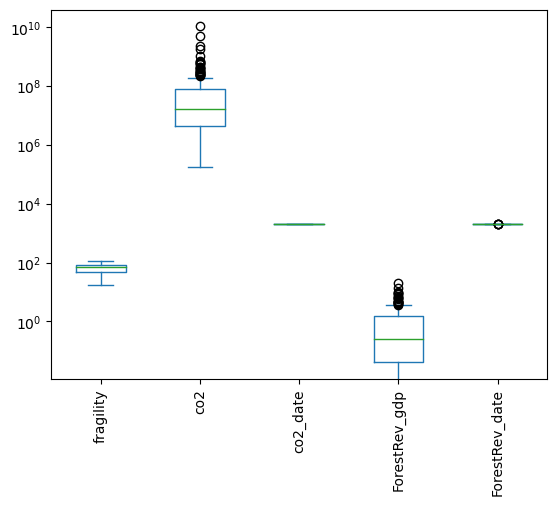

In [180]:
import matplotlib.pyplot as plt

fragciaiso.plot(kind='box', rot=90)
plt.semilogy();

As you see above, the ranges are very different (except the years). Let's make sure all relevant numeric columns share the same range:

In [181]:
columnsToScale=['fragility','co2','ForestRev_gdp'] # you can add more columns

from sklearn import preprocessing

# prepare the process
minmaxSc = preprocessing.MinMaxScaler(feature_range=(0, 10))# default is 0,1

# apply process
minmaxResult = minmaxSc.fit_transform(fragciaiso[columnsToScale])

# result
minmaxResult

array([[9.12008282e+00, 7.16601342e-03, 9.86679822e-02],
       [4.34782609e+00, 3.36115733e-03, 8.88011840e-02],
       [6.05590062e+00, 1.40591243e-01, 4.93339911e-02],
       [7.33954451e+00, 1.78119989e-02, 1.77602368e-01],
       [3.88198758e+00, 5.16101484e-04, 0.00000000e+00],
       [3.01242236e+00, 1.79180039e-01, 4.44005920e-02],
       [5.15527950e+00, 5.73745193e-03, 1.38135175e-01],
       [2.89855072e-01, 3.87723097e-01, 6.41341885e-02],
       [8.38509317e-01, 6.06762693e-02, 3.45337938e-02],
       [5.82815735e+00, 3.26889027e-02, 9.86679822e-03],
       [3.30227743e+00, 3.53752294e-03, 4.93339911e-03],
       [4.85507246e+00, 3.98577008e-02, 0.00000000e+00],
       [7.32919255e+00, 8.91175454e-02, 3.94671929e-02],
       [3.21946170e+00, 1.42020732e-03, 4.93339911e-03],
       [5.31055901e+00, 5.06095056e-02, 5.03206709e-01],
       [1.21118012e+00, 1.18883420e-01, 9.86679822e-03],
       [4.72049689e+00, 3.41592349e-04, 1.52935372e-01],
       [5.86956522e+00, 6.24705

In [182]:
# prepare the process
stdSc = preprocessing.StandardScaler()

# apply process
stdScResult = stdSc.fit_transform(fragciaiso[columnsToScale])

# result
stdScResult


array([[ 1.63361586e+00, -2.05988397e-01, -4.31988061e-01],
       [-3.10676848e-01, -2.10374220e-01, -4.39671422e-01],
       [ 3.85219675e-01, -5.21903614e-02, -4.70404868e-01],
       [ 9.08196456e-01, -1.93716867e-01, -3.70521170e-01],
       [-5.00466809e-01, -2.13653689e-01, -5.08821675e-01],
       [-8.54741403e-01, -7.70941014e-03, -4.74246549e-01],
       [ 1.82924174e-02, -2.07635087e-01, -4.01254615e-01],
       [-1.96395829e+00,  2.32676256e-01, -4.58879826e-01],
       [-1.74042789e+00, -1.44307617e-01, -4.81929910e-01],
       [ 2.92433472e-01, -1.76568397e-01, -5.01138313e-01],
       [-7.36649871e-01, -2.10170925e-01, -5.04979994e-01],
       [-1.04016668e-01, -1.68304989e-01, -5.08821675e-01],
       [ 9.03978902e-01, -1.11523619e-01, -4.78088229e-01],
       [-7.70390309e-01, -2.12611535e-01, -5.04979994e-01],
       [ 8.15557377e-02, -1.55911483e-01, -1.16970243e-01],
       [-1.58859592e+00, -7.72127690e-02, -5.01138313e-01],
       [-1.58844879e-01, -2.13854845e-01

You just got:

In [183]:
type(scaledResult), type(stdScResult)

(numpy.ndarray, numpy.ndarray)

In [184]:
newNames_mM=[name+'_mM' for name in columnsToScale]
newNames_sd=[name+'_sd' for name in columnsToScale]
newNames_mM,newNames_sd

(['fragility_mM', 'co2_mM', 'ForestRev_gdp_mM'],
 ['fragility_sd', 'co2_sd', 'ForestRev_gdp_sd'])

Let me use that array to replace my values in the pandas _Series_:

In [185]:
mMDF=pd.DataFrame(minmaxResult,columns=newNames_mM)
stDF=pd.DataFrame(stdScResult,columns=newNames_sd)

In [186]:
fragciaiso=pd.concat([fragciaiso,mMDF,stDF],axis=1)

fragciaiso.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contry             172 non-null    object 
 1   Officialstatename  172 non-null    object 
 2   InternetccTLD      172 non-null    object 
 3   iso2               171 non-null    object 
 4   iso3               172 non-null    object 
 5   fragility_date     172 non-null    object 
 6   fragility          172 non-null    float64
 7   co2                172 non-null    float64
 8   co2_date           172 non-null    int64  
 9   region             172 non-null    object 
 10  ForestRev_gdp      172 non-null    float64
 11  ForestRev_date     172 non-null    int64  
 12  fragility_mM       172 non-null    float64
 13  co2_mM             172 non-null    float64
 14  ForestRev_gdp_mM   172 non-null    float64
 15  fragility_sd       172 non-null    float64
 16  co2_sd             172 non

Now, these are my new data values:

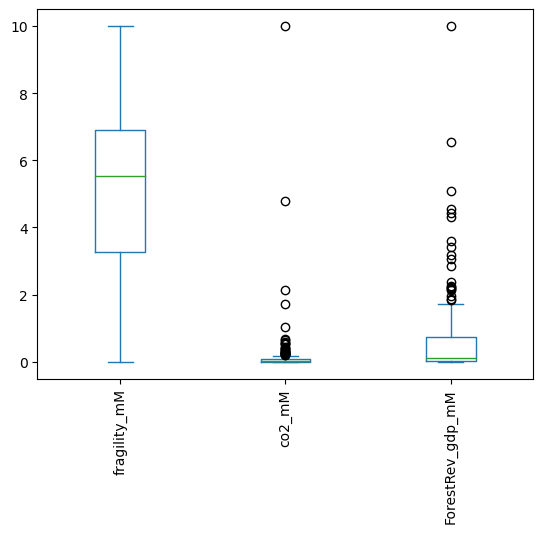

In [187]:
fragciaiso[newNames_mM].plot(kind='box', rot=90);

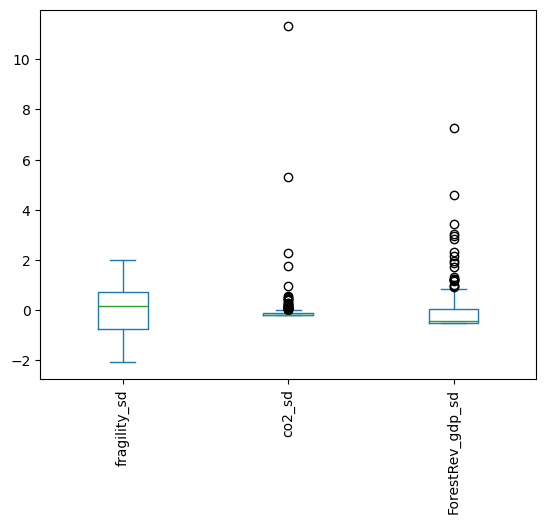

In [188]:
fragciaiso[newNames_sd].plot(kind='box', rot=90);

The data is ready to be exported.


[Home](#home)


______

<a id='exporting'></a>


# Exporting file

The current *demo_fragile* data frame is clean and formatted. It is time to send it to a format that will keep all our work for future use.

#### For future use in Python:

In [190]:
fragciaiso.to_pickle("fragciaiso.csv")

#### For future  use in R:

In [192]:
#try the following before starting Python:
#export LD_LIBRARY_PATH="$(python -m rpy2.situation LD_LIBRARY_PATH)":${LD_LIBRARY_PATH}

from rpy2.robjects import pandas2ri
pandas2ri.activate()

from rpy2.robjects.packages import importr

base = importr('base')
base.saveRDS(fragciaiso,file="fragciaiso.RDS")


#In R, you call it with: DF = readRDS("demfragiso_expo.RDS")
#or, if iyou read from cloud: DF = readRDS(url("https://..../demfragiso_expo.RDS")

<rpy2.rinterface_lib.sexp.NULLType object at 0x16def7510> [0]